In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Загружаем и предварительно обрабатываем данные

In [2]:
# Загружаем первую часть с 1880-1959 год
years = range(1880,2011)
babynames = pd.DataFrame()
for year in years:  
        filename = "yob" + str(year) + ".txt"
        names = pd.read_csv(r"/Users/ctacukoc/Documents/OTUS/Урок 3 (Визуализация)/ДЗ/babynames/" + filename, sep=",", header=None, low_memory=False)
        names.columns = ["name", "sex", "baby_cnt"]
        names["year"] = year
        babynames = babynames.append(names, ignore_index = True)
        print("Успешно загружен {} год. Размер выборки - {} записей".format(year, len(names)))

Успешно загружен 1880 год. Размер выборки - 2000 записей
Успешно загружен 1881 год. Размер выборки - 1935 записей
Успешно загружен 1882 год. Размер выборки - 2127 записей
Успешно загружен 1883 год. Размер выборки - 2084 записей
Успешно загружен 1884 год. Размер выборки - 2297 записей
Успешно загружен 1885 год. Размер выборки - 2294 записей
Успешно загружен 1886 год. Размер выборки - 2392 записей
Успешно загружен 1887 год. Размер выборки - 2373 записей
Успешно загружен 1888 год. Размер выборки - 2651 записей
Успешно загружен 1889 год. Размер выборки - 2590 записей
Успешно загружен 1890 год. Размер выборки - 2695 записей
Успешно загружен 1891 год. Размер выборки - 2660 записей
Успешно загружен 1892 год. Размер выборки - 2921 записей
Успешно загружен 1893 год. Размер выборки - 2831 записей
Успешно загружен 1894 год. Размер выборки - 2941 записей
Успешно загружен 1895 год. Размер выборки - 3049 записей
Успешно загружен 1896 год. Размер выборки - 3091 записей
Успешно загружен 1897 год. Разм

In [4]:
babynames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name        1690784 non-null object
sex         1690784 non-null object
baby_cnt    1690784 non-null int64
year        1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [3]:
babynames.head()
#babynames.tail()

,name,sex,baby_cnt,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### 1. Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [4]:
babynames_group = babynames.groupby(["sex", "year"], as_index = False).agg({'baby_cnt' : np.sum})
babynames_group.tail()

,sex,year,baby_cnt
257,M,2006,2050234
258,M,2007,2069242
259,M,2008,2032310
260,M,2009,1973359
261,M,2010,1898382


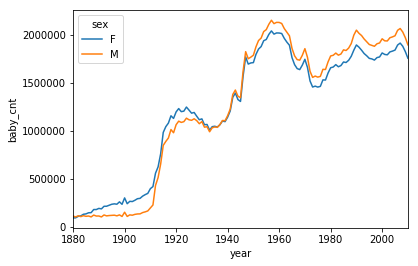

In [91]:
sns.tsplot(data = babynames_group, time="year", unit="sex",condition="sex", value="baby_cnt")

<ol>
  <p><b>Основные выводы по графику:</b></p>
  <li>Общая рождаемость по сравнению с 20-ым веком увеличилась в 3 раза</li>
  <li>С 1880 по 1935 гг. рождаемость была выше у девочек, с 1950 по 2010, рождаемость выше у мальчиков </li>
</ol>

### 2. Найдите самые популярные имена за всю историю

In [6]:
pop_names = babynames.groupby(["name"], as_index = False)["baby_cnt"].sum()
pop_names.sort_values("baby_cnt", ascending=False).head(10)[['name', 'baby_cnt']]

,name,baby_cnt
34995,James,5072771
38950,John,5061897
68084,Robert,4788050
57277,Michael,4265373
55384,Mary,4119074
85076,William,4002392
19333,David,3538748
67665,Richard,2552269
39629,Joseph,2529809
14390,Charles,2347703


### 3. Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

In [7]:
year_list = [] # Разбиваем временной интервал на 10 равных частей
for i in range(1,11):
    year_list.append(i*13 + 1880)

babynames["year_part"] = 0
for yr in year_list:
    babynames.loc[(babynames["year"] <= yr) & (babynames["year_part"] == 0),"year_part"] = yr    

In [8]:
# Выодим 10 самых популярных имен
pop_names_by_year = babynames.groupby(["year_part","sex","name"], as_index = False).agg({"baby_cnt": np.sum})
max_name_by_year = pop_names_by_year.loc[pop_names_by_year.groupby(["year_part","sex"])["baby_cnt"].idxmax()][["year_part", "name","sex"]]

In [9]:
# Вытащим самые популярыне имена для девочек и мальчиков
pop_male_name = max_name_by_year[max_name_by_year["sex"] == "M"]["name"].unique()
pop_female_name = max_name_by_year[max_name_by_year["sex"] == "F"]["name"].unique()
male_name_graph = babynames[(babynames["name"].isin(pop_male_name)) & (babynames["sex"] == "M")]
female_name_graph = babynames[(babynames["name"].isin(pop_female_name)) & (babynames["sex"] =="F")]

Text(0,0.5,'Количество')

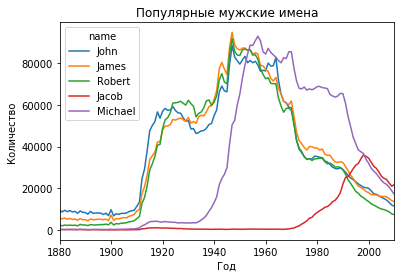

In [145]:
sns.tsplot(data = male_name_graph, time="year", unit="name",condition="name", value="baby_cnt")
plt.title('Популярные мужские имена')
plt.xlabel('Год')
plt.ylabel('Количество')

Text(0,0.5,'Количество')

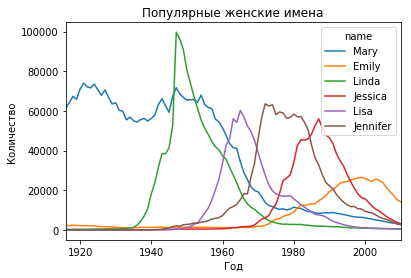

In [146]:
sns.tsplot(data = female_name_graph, time="year", unit="name",condition="name", value="baby_cnt")
plt.title('Популярные женские имена')
plt.xlabel('Год')
plt.ylabel('Количество')

### 4. Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

In [147]:
#Общее кол-во имен по годам
names_by_year = babynames.groupby(["year"]).agg({"baby_cnt":np.sum}).reset_index() 
# 50% всех от всех имен по годам
names_by_year["part50"] = (names_by_year["baby_cnt"]*0.5).astype(int)

# Отсортируем по убыванию кол-ва имен
sort_names_by_year = babynames.sort_values(by=["year","baby_cnt"], ascending=False)
sort_names_by_year["cum_sum"] = sort_names_by_year.groupby('year')['baby_cnt'].cumsum()
mrg_sort_names = pd.merge(sort_names_by_year, names_by_year, on="year")
result = mrg_sort_names[mrg_sort_names["cum_sum"] <= mrg_sort_names["part50"]][["year","name"]].groupby('year').count().reset_index()

Text(0,0.5,'Количество')

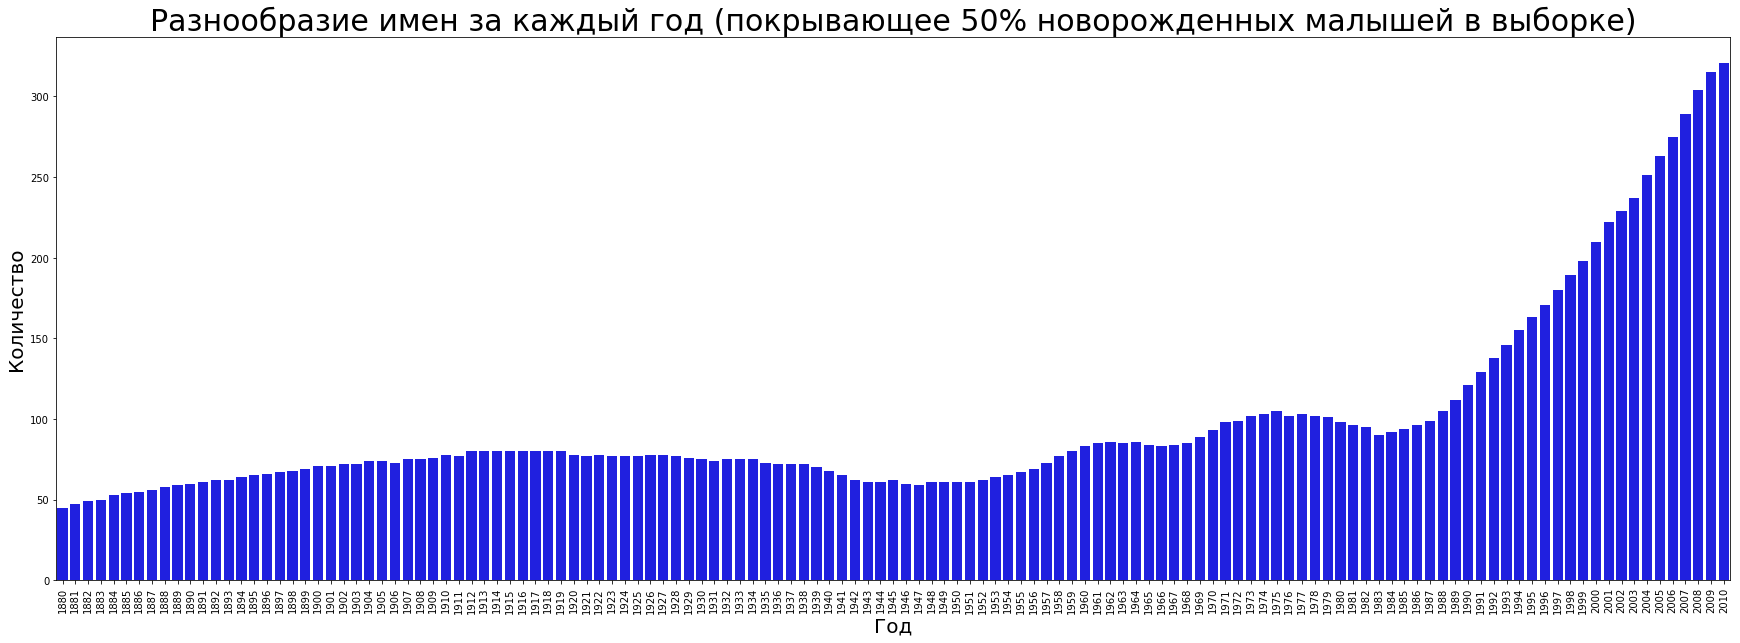

In [152]:
# Рисуем разнообразие покрываемых имен
f, ax = plt.subplots(1, 1, figsize=(30, 10))
g = sns.barplot(result["year"],result["name"], color="b", ax=ax)
rotate = g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax.set_title("Разнообразие имен за каждый год (покрывающее 50% новорожденных малышей в выборке)",size=30)
ax.set_xlabel("Год", size=20)
ax.set_ylabel("Количество", size=20)

Как видно из графика на рисунке с конца 19 до вплоть до 90-ых годов 20 века 50-100 имен покрывали 50% всех малышей, рождашихся в эти временные интервалы. В последующие годы разнообразие имен выросло почти в более чем в 3 раза превысила более 300-ех имен, покрывающих 50% малышей

### 5.Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени

In [62]:
year_list = [1900, 1930, 1970, 2000]
babynames["first_letter"] = babynames["name"].str[0]
babynames["last_letter"] = babynames["name"].str[-1]
names_4_years = babynames[babynames["year"].isin(year_list)]
names_4_years_last = babynames[babynames["year"].isin(year_list)]
names_4_years = names_4_years.groupby(["year","first_letter"], as_index=False)["baby_cnt"].count()
names_4_years_last = names_4_years_last.groupby(["year","last_letter"], as_index=False)["baby_cnt"].count()

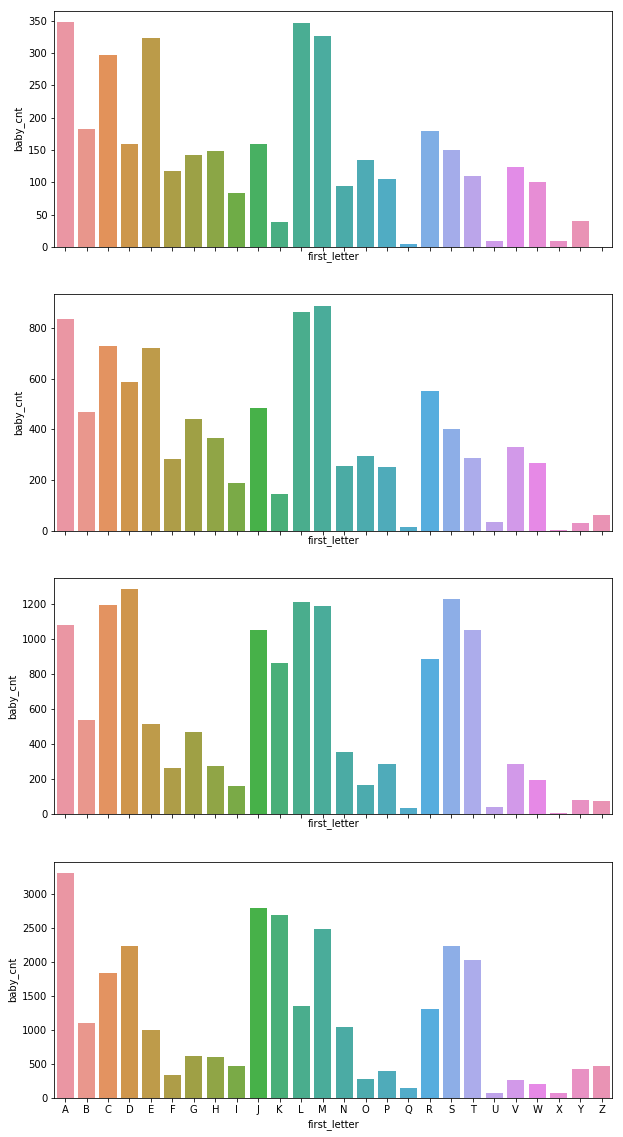

In [156]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

names_4_years[names_4_years["year"] == 1900]["baby_cnt"]
sns.barplot(names_4_years[names_4_years["year"] == 1900]["first_letter"],names_4_years[names_4_years["year"] == 1900]["baby_cnt"], ax = ax1)
sns.barplot(names_4_years[names_4_years["year"] == 1930]["first_letter"],names_4_years[names_4_years["year"] == 1930]["baby_cnt"], ax = ax2)
sns.barplot(names_4_years[names_4_years["year"] == 1970]["first_letter"],names_4_years[names_4_years["year"] == 1970]["baby_cnt"], ax = ax3)
sns.barplot(names_4_years[names_4_years["year"] == 2000]["first_letter"],names_4_years[names_4_years["year"] == 2000]["baby_cnt"], ax = ax4)

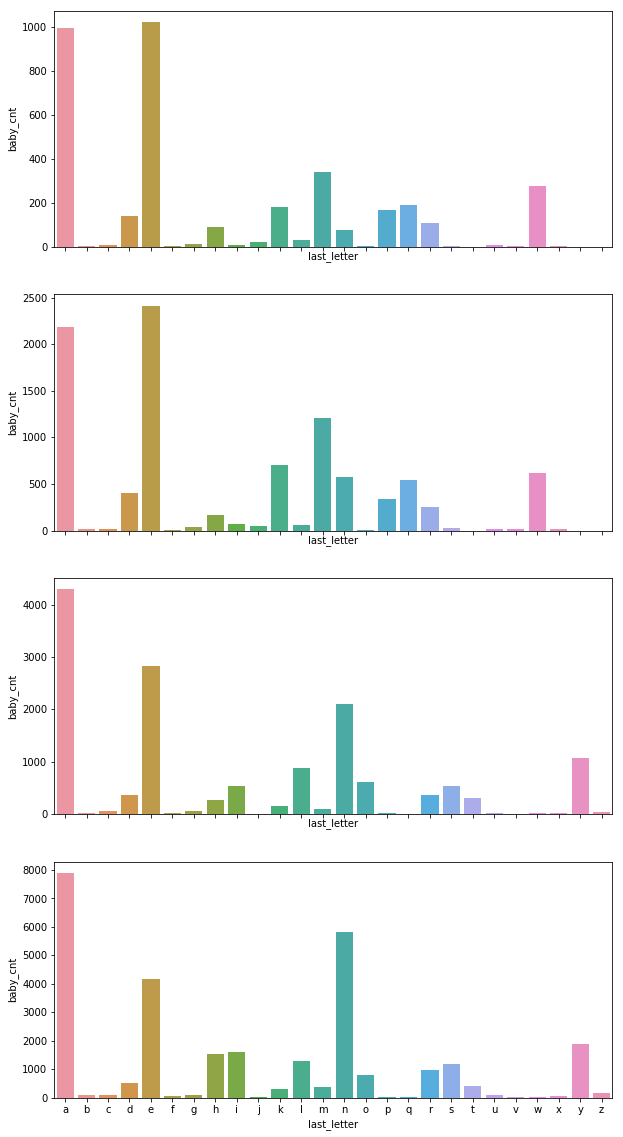

In [63]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

names_4_years_last[names_4_years_last["year"] == 1900]["baby_cnt"]
sns.barplot(names_4_years_last[names_4_years_last["year"] == 1900]["last_letter"],names_4_years_last[names_4_years_last["year"] == 1900]["baby_cnt"], ax = ax1)
sns.barplot(names_4_years_last[names_4_years_last["year"] == 1930]["last_letter"],names_4_years_last[names_4_years_last["year"] == 1930]["baby_cnt"], ax = ax2)
sns.barplot(names_4_years_last[names_4_years_last["year"] == 1970]["last_letter"],names_4_years_last[names_4_years_last["year"] == 1970]["baby_cnt"], ax = ax3)
sns.barplot(names_4_years_last[names_4_years_last["year"] == 2000]["last_letter"],names_4_years_last[names_4_years_last["year"] == 2000]["baby_cnt"], ax = ax4)

### 6. Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию

1 --- ** Франклин Рузвельт - ** 32-й президент США, одна из центральных фигур мировых событий первой половины XX века, 
возглавлял США во время мирового экономического кризиса и Второй мировой войны.
Единственный американский президент, избиравшийся более чем на два срока. 
В историографии его неизменно ставят в один ряд с наиболее выдающимися президентами США

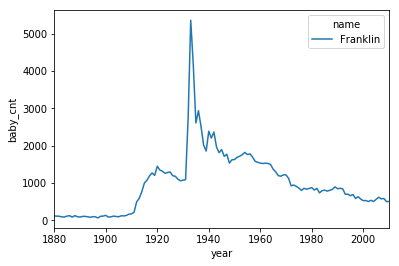

In [94]:
franklin = babynames[(babynames["name"] == 'Franklin') & (babynames["sex"] == 'M')]
sns.tsplot(data = franklin, time="year", unit="name", condition="name", value="baby_cnt")

Как видно из графика выше, возросшая популярность (пик) имени 32-ого президента как раз связана с его первым сроком в с 1933-1937 гг.

2 --- **Мария Склодовская-Кюри** (фр. **Marie** Curie) — французская и польская учёная-экспериментатор (физик, химик), педагог, общественная деятельница. Удостоена Нобелевской премии: по физике **(1903)** и по химии **(1911)**

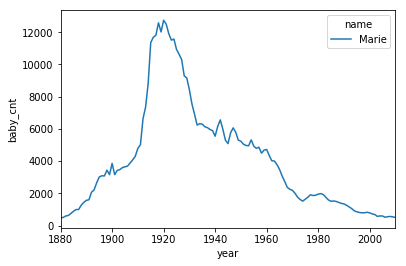

In [95]:
marie = babynames[(babynames["name"] == 'Marie') & (babynames["sex"] == "F")]
sns.tsplot(data = marie, time="year", unit="name", condition="name", value="baby_cnt")

Резкое возростание популярности имени **Marie** в начале 20 века во многом связано с достижениями великой французкой учёной Марией Кюри, которая в 1903 и в 1911 была лауреатом нобелевской премии по физике и химии соответственно.